#DOWNLOAD THE FOLLOWING LIBRARIES

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import svm
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
import warnings
import joblib
import string
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
import re
import nltk
import pickle
import plotly.express as px
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATA PREPROCESSING

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ML_CA2/dataset/spam.csv", encoding='ISO-8859–1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
lst=['class','sentence']
df.columns=lst
df.head()

,class,sentence
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['res'] = df['class'].map({'ham':0, 'spam':1})
df.head()

,class,sentence,res
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
X=df['sentence']
y=df['class']

In [10]:
os = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_os, y_os = os.fit_resample(X.values.reshape(-1, 1), y)
resampled_data = pd.DataFrame({'sentence': X_os.squeeze(), 'class': y_os})
df = resampled_data

#WORD CLOUD

In [ ]:
#generating the word cloud
def generate_word_cloud(i):
  words=''
  for i in df[df['class']==i]['sentence']:
    i=i.lower()
    words+=i+' '
  wc = WordCloud(width=800,height=600).generate(words)
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

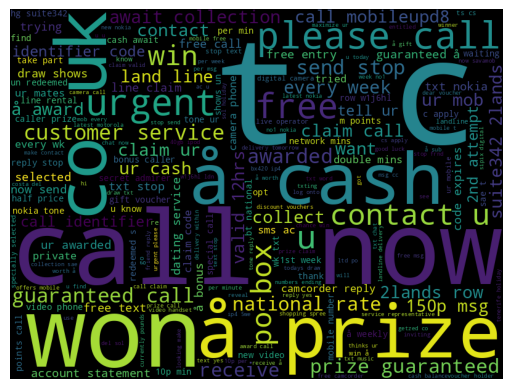

In [ ]:
generate_word_cloud('spam')

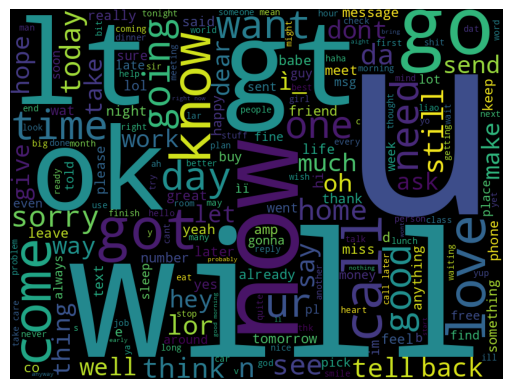

In [ ]:
generate_word_cloud('ham')

#DATA VISUALIZATION

In [ ]:
import pandas as pd
import plotly.express as px

# Count the number of words in each sentence and create a new column "word_count"
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))

# Filter the DataFrame for spam and ham classes separately
spam_df = df[df['class'] == 'spam']
ham_df = df[df['class'] == 'ham']

# Count the frequency of word counts in spam and ham classes
spam_word_count_counts = spam_df['word_count'].value_counts().reset_index()
spam_word_count_counts.columns = ['Word Count', 'Frequency']

ham_word_count_counts = ham_df['word_count'].value_counts().reset_index()
ham_word_count_counts.columns = ['Word Count', 'Frequency']

# Create bar graphs for the frequency of word counts using Plotly
fig_spam = px.bar(spam_word_count_counts, x='Word Count', y='Frequency', title='Frequency of Word Counts in Spam Emails')
fig_ham = px.bar(ham_word_count_counts, x='Word Count', y='Frequency', title='Frequency of Word Counts in Ham Emails')

fig_spam.show()
fig_ham.show()


In [ ]:
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

In [ ]:
fig = px.bar(class_counts, x='Class', y='Count', color='Class')

# Customize the appearance if needed
fig.update_layout(
    title='Count of Ham and Spam Messages',
    xaxis_title='Class',
    yaxis_title='Count',
    showlegend=False,
    width = 600,
    height = 500,
)
fig.show()

In [ ]:
words=''
for i in df[df['class']=='spam']['sentence']:
  i=i.lower()
  words+=i+' '
spam_cloud = WordCloud(width=800,height=600).generate(words)

In [ ]:
df_spam = pd.DataFrame()
df_spam['words'] = spam_cloud.words_.keys()
df_spam['frequencies'] = spam_cloud.words_.values()
df_spam_sorted = df_spam.sort_values(by=['frequencies'], ascending=[0]).head(20)
color_scale = px.colors.qualitative.Set1
fig = px.bar(
    df_spam_sorted,
    x='words',
    y='frequencies',
    labels={'words': 'Words', 'frequencies': 'Frequencies'},
    title='Top 20 Spam Words and Frequencies',
    color='words',  # Use the 'words' column for coloring
    color_discrete_sequence=color_scale
)

# Customize the appearance of the chart (optional)
fig.update_traces(texttemplate='%{value}', textposition='outside')

# Show the chart
fig.show()

In [ ]:
words=''
for i in df[df['class']=='ham']['sentence']:
  i=i.lower()
  words+=i+' '
ham_cloud = WordCloud(width=800,height=600).generate(words)

In [ ]:
df_ham = pd.DataFrame()
df_ham['words'] = ham_cloud.words_.keys()
df_ham['frequencies'] = ham_cloud.words_.values()
df_ham_sorted = df_ham.sort_values(by=['frequencies'], ascending=[0]).head(20)
color_scale = px.colors.qualitative.Set1
fig = px.bar(
    df_ham_sorted,
    x='words',
    y='frequencies',
    labels={'words': 'Words', 'frequencies': 'Frequencies'},
    title='Top 20 ham Words and Frequencies',
    color='words',  # Use the 'words' column for coloring
    color_discrete_sequence=color_scale
)

# Customize the appearance of the chart (optional)
fig.update_traces(texttemplate='%{value}', textposition='outside')

# Show the chart
fig.show()

In [ ]:
#Sentimen Analysis
from textblob import TextBlob

# Sample email subjects (replace with your actual email data)

# Function to classify email subjects as spam or not based on sentiment
def classify_spam_or_ham(subject):
    analysis = TextBlob(subject)
    # You can customize the threshold based on your requirements
    if analysis.sentiment.polarity > 0:
        return "Ham"
    else:
        return "Spam"

# Classify email subjects as spam or ham
for subject in df['sentence']:
    classification = classify_spam_or_ham(subject)
    print(f"Subject: '{subject}' is classified as '{classification}'")



In [ ]:
from textblob import TextBlob
import pandas as pd
import plotly.express as px


# Function to classify email subjects as spam or not based on sentiment
def classify_spam_or_ham(subject):
    analysis = TextBlob(subject)
    # You can customize the threshold based on your requirements
    if analysis.sentiment.polarity > 0:
        return "Ham"
    else:
        return "Spam"

# Classify email subjects as spam or ham
classifications = [classify_spam_or_ham(subject) for subject in df['sentence']]

# Create a DataFrame from the data
data_analyse = {'Subject': df['sentence'], 'Classification': classifications}
df_analyse = pd.DataFrame(data_analyse)

# Count the number of emails in each category
category_counts = df_analyse['Classification'].value_counts()

# Create a pie chart to visualize the distribution
fig = px.pie(df_analyse, names=category_counts.index, title='Email Classification by Sentiment')

# Show the chart
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
from collections import Counter

# Filter sentences for spam and ham
spam_sentences = df[df['class'] == 'spam']['sentence']
ham_sentences = df[df['class'] == 'ham']['sentence']

# Tokenize and count words in spam emails
spam_word_counts = Counter(" ".join(spam_sentences).lower().split())
# Tokenize and count words in ham emails
ham_word_counts = Counter(" ".join(ham_sentences).lower().split())

# Create DataFrames for spam and ham word counts
spam_df = pd.DataFrame({'word': spam_word_counts.keys(), 'count': spam_word_counts.values()})
ham_df = pd.DataFrame({'word': ham_word_counts.keys(), 'count': ham_word_counts.values()})

# Sort DataFrames by count in descending order
spam_df = spam_df.sort_values(by='count', ascending=False)
ham_df = ham_df.sort_values(by='count', ascending=False)

# Select the top 10 most used words in spam and ham
top_spam_words = spam_df.head(20)
top_ham_words = ham_df.head(20)

# Create bar charts for spam and ham word frequencies
fig_spam = px.bar(top_spam_words, x='word', y='count', title='Frequent words on Spam sentences',color = 'word')
fig_ham = px.bar(top_ham_words, x='word', y='count', title='Frequent words on Spam sentences', color = 'word')

# Show the charts
fig_spam.show()
fig_ham.show()


#BAG OF WORDS AND MULTINOMIAL NB




In [ ]:
ps = PorterStemmer()
lm = WordNetLemmatizer()

In [ ]:
def text_process(i):
  review = re.sub('[^a-zA-Z]', ' ',i)
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  return review

In [ ]:
corpus = []
for i in range(0, len(df)):
  corpus.append(text_process(df['sentence'][i]))

In [ ]:
#Implementing count vectorizer to create the bag of words
count_vec=CountVectorizer(decode_error='ignore')
X = count_vec.fit_transform(corpus).toarray()
y=pd.get_dummies(df['class'])
y=y.iloc[:,1].values

In [ ]:
#handling the imbalance in data
smk= SMOTETomek()
X_bal, y_bal = smk.fit_resample(X, y)

In [ ]:
#splitting the training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X_bal,y_bal,test_size=0.3,random_state=101)

In [ ]:
#MULTINOMIAL NAIVE BAYES
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
print('train accuracy',mnb.score(X_train,Y_train)*100)
print('test accuracy ',mnb.score(X_test,Y_test)*100)

train accuracy 98.03108808290155
test accuracy  97.44386873920553


In [ ]:
pickle.dump(mnb,open('/content/drive/MyDrive/ML_CA2/models/mnb_model.sav','wb'))
pickle.dump(count_vec,open('/content/drive/MyDrive/ML_CA2/models/mnb_vectorizer.sav','wb'))


In [ ]:
# Example new messages to test
new_messages ="Buy our new product for a special discount!"
# Preprocess the new messages
mnb=pickle.load(open('/content/drive/MyDrive/ML_CA2/models/mnb_model.sav','rb'))
count_vec=pickle.load(open('/content/drive/MyDrive/ML_CA2/models/mnb_vectorizer.sav','rb'))
message=text_process(new_messages)
predictions = mnb.predict(count_vec.transform([message]).toarray())
if predictions == 1:
  print(f"Message: '{message}' is SPAM")
else:
  print(f"Message: '{message}' is HAM")

#TFIDF AND MULTINOMIAL NB

In [ ]:
lm = WordNetLemmatizer()
def text_process_tf(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
corpus = []
for i in range(0, len(df)):
    corpus.append(text_process_tf(df['sentence'][i]))

In [ ]:
cv_tfidf = TfidfVectorizer(decode_error='ignore')
x = cv_tfidf.fit_transform(corpus).toarray()
y = df['class']

In [ ]:
# Encode the target variable 'class'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Use SMOTE for balancing the dataset
smk = SMOTE(random_state=42)
x_bal, y_bal = smk.fit_resample(x, y_encoded)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.20, random_state=0)

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

In [ ]:
train_accuracy = accuracy_score(y_train, mnb.predict(x_train))
test_accuracy = accuracy_score(y_test, mnb.predict(x_test))

In [ ]:
print('Train Accuracy:', train_accuracy * 100)
print('Test Accuracy:', test_accuracy * 100)

In [ ]:
joblib.dump(mnb, '/content/drive/MyDrive/ML_CA2/models/mnbtf_model.sav')
joblib.dump(cv_tfidf, '/content/drive/MyDrive/ML_CA2/models/mnbtf_vectorizer.pkl')

In [ ]:
# Load the Multinomial Naive Bayes model and CountVectorizer model
mnb = joblib.load('/content/drive/MyDrive/ML_CA2/models/mnbtf_model.sav')
cv_tfidf = joblib.load('/content/drive/MyDrive/ML_CA2/models/mnbtf_vectorizer.pkl')

new_text = "25 percent discount on all shirts"
processed_text = text_process_tf(new_text)

# Transform the new text data using the loaded CountVectorizer
new_text_vectorized = cv_tfidf.transform([processed_text]).toarray()

predicted_class = mnb.predict(new_text_vectorized)
predicted_label = label_encoder.inverse_transform(predicted_class)

print("Predicted Class:", predicted_class[0])
print("Predicted Label:", predicted_label[0])

# SVM

In [ ]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['class'])

In [ ]:
def get_importantFeatures(sent):
    sent = sent.lower()
    returnList = []
    sent = nltk.word_tokenize(sent)
    for i in sent:
        if i.isalnum():
            returnList.append(i)
    return returnList

def removing_stopWords(sent):
    returnList = []
    for i in sent:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            returnList.append(i)
    return returnList

def potter_stem(sent):
    returnList = []
    for i in sent:
        returnList.append(ps.stem(i))
    return " ".join(returnList)

In [ ]:
df['imp_feature'] = df['sentence'].apply(get_importantFeatures)
df['imp_feature'] = df['imp_feature'].apply(removing_stopWords)
df['imp_feature'] = df['imp_feature'].apply(potter_stem)

In [ ]:
X = df['imp_feature']
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# TF-IDF vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Grid search for hyperparameter tuning
tuned_parameters = {'kernel': ['linear', 'rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(X_train_tfidf, y_train)

In [ ]:
joblib.dump(mnb, '/content/drive/MyDrive/ML_CA2/models/svm_model.sav')
joblib.dump(cv_tfidf, '/content/drive/MyDrive/ML_CA2/models/svm_vectorizer.pkl')

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/ML_CA2/models/svm_model.sav')
loaded_tfidf = joblib.load('/content/drive/MyDrive/ML_CA2/models/svm_vectorizer.pkl')

In [ ]:
# Input text to be checked for spam
input_text = "25 percent discount on all shirts.?"
is_spam = loaded_model.predict(loaded_tfidf.transform([input_text]))
if is_spam == 1:
  print("text is spam")
else:
  print("text is not spam")

#LOGISTIC REGRESSION

In [ ]:
# Text preprocessing: convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Use the same vectorizer parameters as in training
X = vectorizer.fit_transform(df['sentence'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the trained model and vectorizer to files
model_filename = '/content/drive/MyDrive/ML_CA2/models/log_model.pkl'
vectorizer_filename = '/content/drive/MyDrive/ML_CA2/models/log_vectorizer.pkl'
joblib.dump(model, model_filename)
joblib.dump(vectorizer, vectorizer_filename)



In [ ]:
# Load the trained model and vectorizer from the files (for testing or later use)
loaded_model = joblib.load(model_filename)
loaded_vectorizer = joblib.load(vectorizer_filename)

# Test the loaded model on a new dataset
text_to_test = ["You won a free iPhone! Claim your prize now!"]
X_new = loaded_vectorizer.transform(text_to_test)
prediction = loaded_model.predict(X_new)

# Convert prediction (0 for not spam, 1 for spam) to human-readable label
if prediction[0] == 0:
    result = "Not Spam"
else:
  result = "Spam"

print("Prediction:", result)

#KNN

In [ ]:
vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(df['sentence'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a KNN classifier
k = 5  # Adjust the number of neighbors as needed
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Save the trained model and vectorizer to files
model_filename = '/content/drive/MyDrive/ML_CA2/models/knn_model.pkl'
vectorizer_filename = '/content/drive/MyDrive/ML_CA2/models/knn_vectorizer.pkl'
joblib.dump(model, model_filename)
joblib.dump(vectorizer, vectorizer_filename)




In [ ]:
# Load the trained model and vectorizer from the files (for testing or later use)
loaded_model = joblib.load(model_filename)
loaded_vectorizer = joblib.load(vectorizer_filename)

# Test the loaded model on a new dataset
text_to_test = ["You won a free iPhone! Claim your prize now!"]
X_new = loaded_vectorizer.transform(text_to_test)
prediction = loaded_model.predict(X_new)

# Convert prediction (0 for not spam, 1 for spam) to human-readable label
if prediction[0] == 0:
    result = "Not Spam"
else:
    result = "Spam"

print("Prediction:", result)

#LIME AND SHAP


In [11]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=42350078205a174b222eb6137443e1e229c71bc2d4b3d56a1301f686de0c65a8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [13]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.4 MB/s eta 0:00:00


In [12]:
from lime.lime_text import LimeTextExplainer
X = df['sentence']
y = df['class']

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

explain = LimeTextExplainer(class_names=['ham', 'spam'])

y_test.reset_index(drop=True, inplace=True)

random_instance_index = np.random.randint(X_test.shape[0])
text_instance = X_test[random_instance_index]
true_label = y_test[random_instance_index]

text_instance = " ".join(vectorizer.get_feature_names_out()[text_instance.indices])

text_instance = [text_instance]

def predict_proba(text_instances):
    text_instances_tfidf = vectorizer.transform(text_instances)
    probabilities = logistic_model.predict_proba(text_instances_tfidf)
    return probabilities
explanation = explain.explain_instance(text_instance[0], predict_proba, num_features=10)
explanation.show_in_notebook()

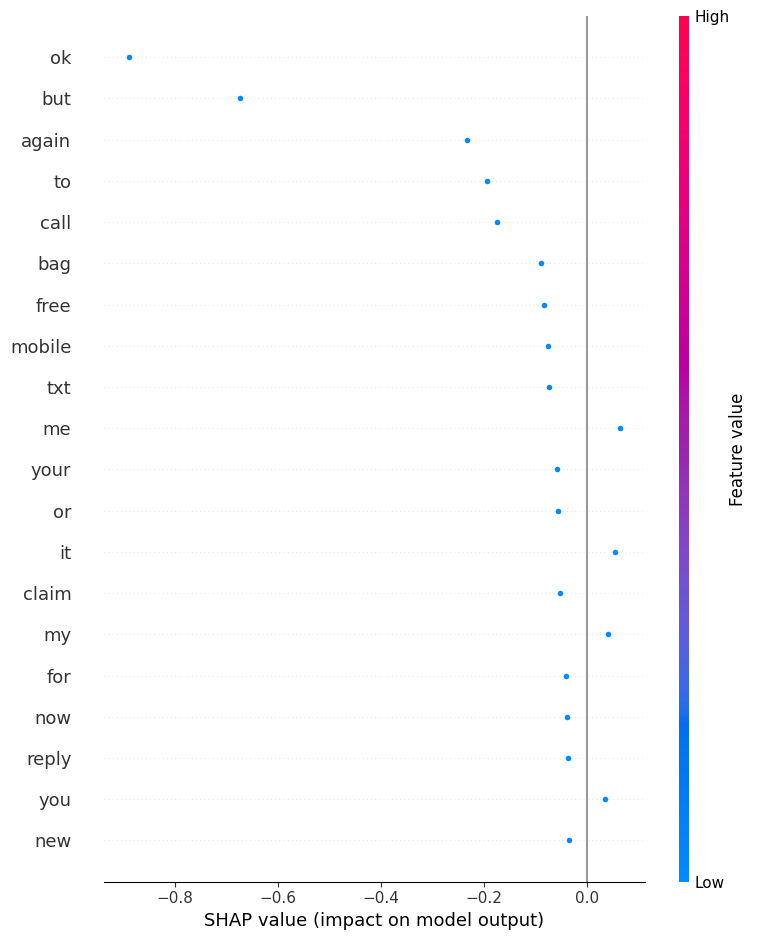

In [15]:
import shap
explainer = shap.Explainer(logistic_model, X_train)

instance_to_explain = X_test[0].toarray()

# Calculate SHAP values for the instance
shap_values = explainer.shap_values(instance_to_explain)

# Plot the SHAP values
shap.summary_plot(shap_values, instance_to_explain, feature_names=vectorizer.get_feature_names_out())